In [1]:
import numpy as np
import pandas as pd

In [2]:
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True).assign(
    trading_volume=lambda x: pd.cut(
        x.volume, bins=3, labels=['low', 'med', 'high']))
fb.head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


# Time-based selection and filtering
Remember, when we have a DatetimeIndex, we can use datetime slicing. We can provide a range of dates. We only get three days back because the stock market is closed on the weekends:

In [3]:
fb['2018-10-11':'2018-10-15']

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.1600,153.35,35338901,low
2018-10-12,156.73,156.89,151.2998,153.74,25293492,low
2018-10-15,153.32,155.57,152.5500,153.52,15433521,low


The first() method will give us a specified length of time from the beginning of the time series. Here, we ask for a week. January 1, 2018 was a holiday—meaning the market was closed. It was also a Monday, so the week here is only four days:

In [4]:
fb.first('1W')

/tmp/ipykernel_2597/2655357208.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


The last() method will take from the end:

In [5]:
fb.last('1W')

/tmp/ipykernel_2597/2477606097.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.last('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


In [6]:
# we can enable  turn off all future warnings for the project that I'm currently working on:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [7]:
stock_data_per_minute = pd.read_csv('fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True, 
                                    date_parser=lambda x: pd.to_datetime(
                                        x, format = '%Y-%m-%d %H-%M'))
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


We can use the Grouper to roll up our data to the daily level along with first and last:

In [8]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
    'open' : 'first',
    'high' : 'max',
    'low' : 'min',
    'close' : 'last',
    'volume' : 'sum'})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


The at_time() method allows us to pull out all datetimes that match a certain time. Here, we can grab all the rows from the time the stock market opens (9:30 AM):

In [9]:
stock_data_per_minute.at_time('9:30')

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.0
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.0
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.0
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.0
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.0


We can use between_time() to grab data for the last two minutes of trading daily:

In [10]:
stock_data_per_minute.between_time('15:59', '16:00')

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.915,182.915,182.915,182.915,134569.0
2019-05-20 16:00:00,182.720,182.720,182.720,182.720,1113672.0
2019-05-21 15:59:00,184.840,184.840,184.840,184.840,61606.0
2019-05-21 16:00:00,184.820,184.820,184.820,184.820,801080.0
2019-05-22 15:59:00,185.290,185.290,185.290,185.290,96099.0
2019-05-22 16:00:00,185.320,185.320,185.320,185.320,1220993.0
2019-05-23 15:59:00,180.720,180.720,180.720,180.720,109648.0
2019-05-23 16:00:00,180.870,180.870,180.870,180.870,1329217.0
2019-05-24 15:59:00,181.070,181.070,181.070,181.070,52994.0


On average, are more shares traded within the first 30 minutes of trading or in the last 30 minutes? We can combine between_time() with Groupers and filter() . For the week in question, more are traded on average around opening time than closing time:

In [11]:
shares_traded_in_first_30_min = stock_data_per_minute\
    .between_time('9:30', '10:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()

shares_traded_in_last_30_min = stock_data_per_minute\
    .between_time('15:30', '16:00')\
    .groupby(pd.Grouper(freq='1D'))\
    .filter(lambda x: (x.volume > 0).all())\
    .volume.mean()

shares_traded_in_first_30_min - shares_traded_in_last_30_min

18592.967741935485

In cases where time doesn't matter, we can normalize the times to midnight:

In [12]:
pd.DataFrame(
    dict(before=stock_data_per_minute.index, after=stock_data_per_minute.index.normalize())
).head()

,before,after
0,2019-05-20 09:30:00,2019-05-20
1,2019-05-20 09:31:00,2019-05-20
2,2019-05-20 09:32:00,2019-05-20
3,2019-05-20 09:33:00,2019-05-20
4,2019-05-20 09:34:00,2019-05-20


Note that we can also use normalize() on a Series object after accessing the dt attribute:

In [13]:
stock_data_per_minute.index.to_series().dt.normalize().head()

date
2019-05-20 09:30:00   2019-05-20
2019-05-20 09:31:00   2019-05-20
2019-05-20 09:32:00   2019-05-20
2019-05-20 09:33:00   2019-05-20
2019-05-20 09:34:00   2019-05-20
Name: date, dtype: datetime64[ns]

We can use shift() to create some lagged data. By default, the shift will be one period. For example, we can use shift() to create a new column that indicates the previous day's closing price. From this new column, we can calculate the price change due to after hours trading (after the close one day right up to the open the following day):

In [14]:
fb.assign(
    prior_close=lambda x: x.close.shift(),
    after_hours_change_in_price=lambda x: x.open - x.prior_close,
    abs_change=lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


The tshift() method will shift the DatetimeIndex rather than the data. However, if the goal is to to add/subtract time we can use pd.Timedelta:

In [15]:
pd.date_range('2018-01-01', freq='D', periods=5) + pd.Timedelta('9 hours 30 minutes')

DatetimeIndex(['2018-01-01 09:30:00', '2018-01-02 09:30:00',
               '2018-01-03 09:30:00', '2018-01-04 09:30:00',
               '2018-01-05 09:30:00'],
              dtype='datetime64[ns]', freq='D')

When working with stock data, we only have data for the dates the market was open. We can use first_valid_index() to give us the index of the first non-null entry in our data. For September 2018, this is September 4th:

In [16]:
date_to_check = '2018-09-30'
date_in_index = pd.to_datetime(date_to_check) in fb.index

print(date_in_index)

False


In [17]:
print(fb.index)

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=251, freq=None)


If we ask for it, we will get the data from the index we got from fb['2018-09'].last_valid_index(), which was September 28th:

In [18]:
fb.asof('2018-09-30')

open                168.33
high                168.79
low                 162.56
close               164.46
volume            34265638
trading_volume         low
Name: 2018-09-30 00:00:00, dtype: object

Differenced data
Using the diff() method is a quick way to calculate the difference between the data and a lagged version of it. By default, it will yield the result of data - data.shift():

In [19]:
(
    fb.drop(columns='trading_volume') 
    - fb.drop(columns='trading_volume').shift()
).equals(
    fb.drop(columns='trading_volume').diff()
)

True

We can use this to see how Facebook stock changed day-over-day:

In [20]:
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.7800,3.25,-1265340.0
2018-01-04,3.02,1.43,2.7696,-0.34,-3005667.0
2018-01-05,0.69,0.69,0.8304,2.52,-306361.0
2018-01-08,1.61,2.00,1.4000,1.43,4420191.0


We can specify the number of periods, can be any positive or negative integer:

In [21]:
fb.drop(columns='trading_volume').diff(-3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,-7.91,-5.32,-7.3800,-5.43,4577368.0
2018-01-03,-5.32,-4.12,-5.0000,-3.61,-1108163.0
2018-01-04,-3.80,-2.59,-3.0004,-3.54,1487839.0
2018-01-05,-1.35,-0.99,-0.7000,-0.99,3044641.0
2018-01-08,-1.20,0.50,-1.0500,0.51,8406139.0


Resampling
Sometimes the data is at a granularity that isn't conducive to our analysis. Consider the case where we have data per minute for the full year of 2018. Let's see what happens if we try to plot this.

Plotting will be covered next chapter, so don't worry too much about the code.

First, we import matplotlib for plotting:

In [22]:
import matplotlib.pyplot as plt

Then we will look at the plot at the minute level and at the daily aggregated level (summed):

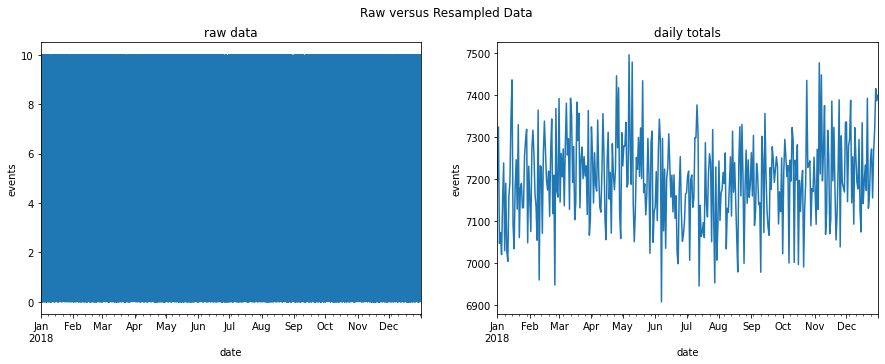

In [23]:
np.random.seed(0)
index = pd.date_range('2018-01-01', freq='T', periods=365*24*60)
raw = pd.DataFrame(
    np.random.uniform(0, 10, size=index.shape[0]), index=index
)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
raw.plot(legend=False, ax=axes[0], title='raw data')
raw.resample('1D').sum().plot(legend=False, ax=axes[1], title='daily totals')
for ax in axes:
    ax.set_xlabel('date')
    ax.set_ylabel('events')
    
plt.suptitle('Raw versus Resampled Data')
plt.show()

The plot on the left has so much data we can't see anything. However, when we aggregate to the daily totals, we see the data. We can alter the granularity of the data we are working with using resampling. Recall our minute-by-minute stock data:

In [24]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


We can resample this to get to a daily frequency:

In [25]:
stock_data_per_minute.resample('1D').agg({
    'open': 'first',
    'high': 'max', 
    'low': 'min', 
    'close': 'last', 
    'volume': 'sum'
})

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


We can downsample to quarterly data

In [26]:
# Convert categorical columns to numeric if applicable
fb = fb.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.dtype.name == 'category' else x)
resampled_fb = fb.resample('Q').mean()
print(resampled_fb)

                  open        high         low       close        volume  \
date                                                                       
2018-03-31  179.472295  181.794659  177.040428  179.551148  3.292640e+07   
2018-06-30  180.373770  182.277689  178.595964  180.704688  2.405532e+07   
2018-09-30  180.812130  182.890886  178.955229  181.028492  2.701982e+07   
2018-12-31  145.272460  147.620121  142.718943  144.868730  2.697433e+07   

            trading_volume  
date                        
2018-03-31             NaN  
2018-06-30             NaN  
2018-09-30             NaN  
2018-12-31             NaN  


In [27]:
# Drop categorical columns before resampling
fb_numeric = fb.select_dtypes(exclude=['category'])
resampled_fb = fb_numeric.resample('Q').mean()
print(resampled_fb)

                  open        high         low       close        volume  \
date                                                                       
2018-03-31  179.472295  181.794659  177.040428  179.551148  3.292640e+07   
2018-06-30  180.373770  182.277689  178.595964  180.704688  2.405532e+07   
2018-09-30  180.812130  182.890886  178.955229  181.028492  2.701982e+07   
2018-12-31  145.272460  147.620121  142.718943  144.868730  2.697433e+07   

            trading_volume  
date                        
2018-03-31             NaN  
2018-06-30             NaN  
2018-09-30             NaN  
2018-12-31             NaN  


The first approach attempts to convert categorical columns to numeric values, coercing any non-numeric values to NaN. The second approach simply drops the categorical columns before resampling.

Try these methods and see if they resolve the issue. If you still encounter problems, please share more details about your DataFrame, and we can troubleshoot further!

In [28]:
fb.resample('Q').mean()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-03-31,179.472295,181.794659,177.040428,179.551148,3.292640e+07,NaN
2018-06-30,180.373770,182.277689,178.595964,180.704688,2.405532e+07,NaN
2018-09-30,180.812130,182.890886,178.955229,181.028492,2.701982e+07,NaN
2018-12-31,145.272460,147.620121,142.718943,144.868730,2.697433e+07,NaN


We can also use apply(). Here, we show the quarterly change from start to end:

In [29]:
fb.drop(columns='trading_volume').resample('Q').apply(
    lambda x: x.last('1D').values - x.first('1D').values
)

date
2018-03-31    [[-22.53, -20.160000000000025, -23.41000000000...
2018-06-30    [[39.50999999999999, 38.399700000000024, 39.84...
2018-09-30    [[-25.039999999999992, -28.659999999999997, -2...
2018-12-31    [[-28.580000000000013, -31.24000000000001, -31...
Freq: Q-DEC, dtype: object

Consider the following melted stock data by the minute. We don't see the OHLC data directly:

In [30]:
melted_stock_data = pd.read_csv('melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


We can use the ohlc() method after resampling to recover the OHLC columns:

In [31]:
melted_stock_data.resample('1D').ohlc()['price']

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


Alternatively, we can upsample to increase the granularity. Note this will introduce NaN values:

In [32]:
fb.resample('6H').asfreq().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,NaN
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,NaN


There are many ways to handle these NaN values. We can forward-fill with ffill :

In [33]:
fb.resample('6H').ffill().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,NaN
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,NaN
2018-01-02 12:00:00,177.68,181.58,177.55,181.42,18151903,NaN
2018-01-02 18:00:00,177.68,181.58,177.55,181.42,18151903,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,NaN


We can specify a specific value or a method with fillna():

In [34]:
fb.resample('6H').fillna('nearest').head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,NaN
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,NaN
2018-01-02 12:00:00,181.88,184.78,181.33,184.67,16886563,NaN
2018-01-02 18:00:00,181.88,184.78,181.33,184.67,16886563,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,NaN


We can use asfreq() and assign() to specify the action per column:

In [35]:
fb.resample('6H').asfreq().assign(
    volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
    close=lambda x: x.close.fillna(method='ffill'), # carry forward
    # take the closing price if these aren't available
    open=lambda x: np.where(x.open.isnull(), x.close, x.open),
    high=lambda x: np.where(x.high.isnull(), x.close, x.high),
    low=lambda x: np.where(x.low.isnull(), x.close, x.low)
).head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,NaN
2018-01-02 06:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-02 12:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-02 18:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,NaN
